TensorFlow versión: 2.19.0
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Imágenes entrenamiento: (60000, 28, 28)
Imágenes test: (10000, 28, 28)


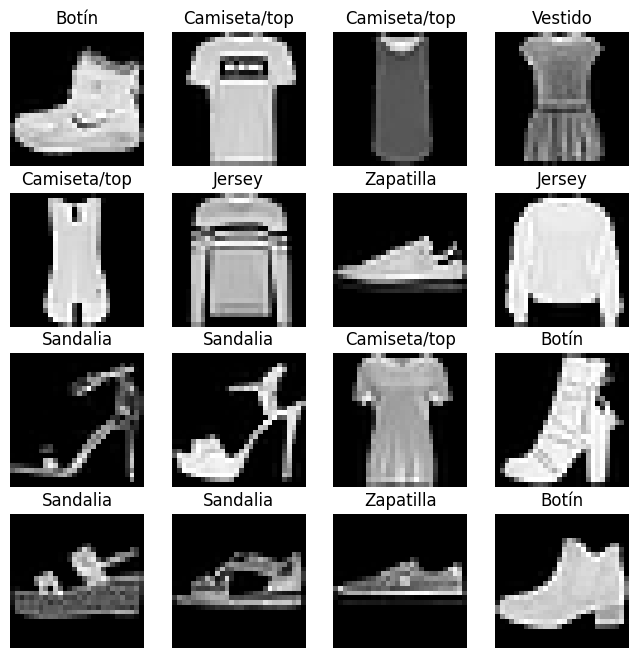

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7689 - loss: 0.6687 - val_accuracy: 0.8403 - val_loss: 0.4544
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8581 - loss: 0.3995 - val_accuracy: 0.8576 - val_loss: 0.3926
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8734 - loss: 0.3542 - val_accuracy: 0.8697 - val_loss: 0.3633
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8811 - loss: 0.3235 - val_accuracy: 0.8682 - val_loss: 0.3727
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8877 - loss: 0.3025 - val_accuracy: 0.8698 - val_loss: 0.3603
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8925 - loss: 0.2896 - val_accuracy: 0.8857 - val_loss: 0.3244
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9002 - loss: 0.2722 - val_accuracy: 0.8823 - val_loss: 0.3232
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9058 - loss: 0.2566 -

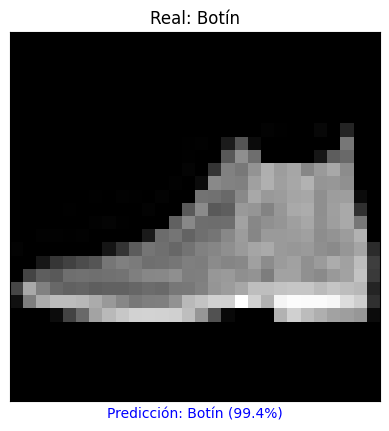

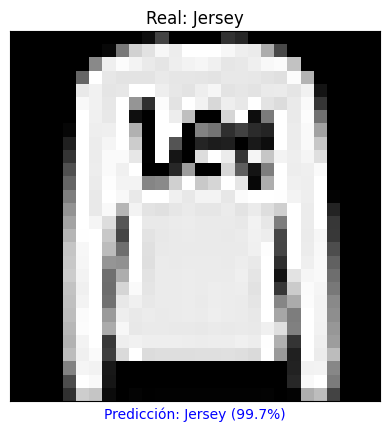

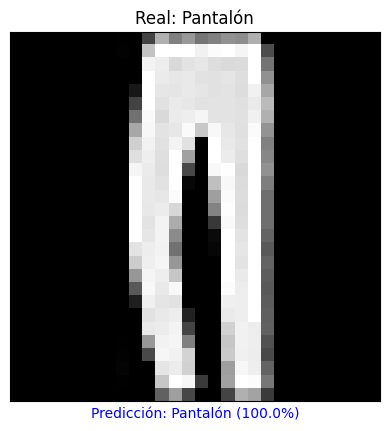

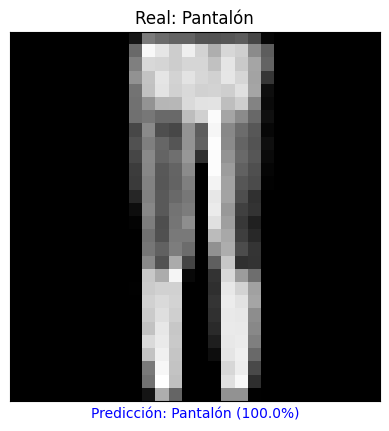

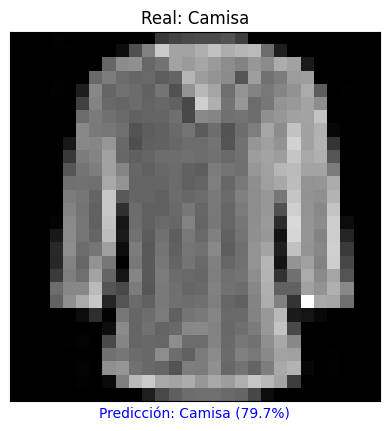

In [ ]:
# ============================================================
# IA que clasifica prendas de ropa por su forma
# Dataset: Fashion-MNIST (60.000 imágenes)
# ============================================================

# 1️⃣ Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

print("TensorFlow versión:", tf.__version__)

# 2️⃣ Cargar dataset Fashion-MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 3️⃣ Nombres de las clases
class_names = [
    'Camiseta/top',
    'Pantalón',
    'Jersey',
    'Vestido',
    'Abrigo',
    'Sandalia',
    'Camisa',
    'Zapatilla',
    'Bolso',
    'Botín'
]

print("Imágenes entrenamiento:", train_images.shape)
print("Imágenes test:", test_images.shape)

# 4️⃣ Normalizar imágenes (0-255 → 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# 5️⃣ Mostrar algunas imágenes del dataset
plt.figure(figsize=(8,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(class_names[train_labels[i]])
    plt.axis('off')
plt.show()

# 6️⃣ Crear el modelo (red neuronal básica)
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)  # 10 tipos de ropa
])

# 7️⃣ Compilar el modelo
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 8️⃣ Entrenar el modelo
history = model.fit(
    train_images,
    train_labels,
    epochs=10,
    validation_split=0.2
)

# 9️⃣ Evaluar en datos de prueba
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("\nPrecisión en test:", test_acc)

# 🔟 Añadir capa Softmax para obtener probabilidades
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

# 1️⃣1️⃣ Hacer predicciones
predictions = probability_model.predict(test_images)

# 1️⃣2️⃣ Función para mostrar predicción
def mostrar_prediccion(i):
    plt.figure()
    plt.imshow(test_images[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])

    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]

    color = "blue" if pred_label == true_label else "red"

    plt.xlabel(
        f"Predicción: {class_names[pred_label]} ({100*np.max(predictions[i]):.1f}%)",
        color=color
    )
    plt.title(f"Real: {class_names[true_label]}")
    plt.show()

# Mostrar algunas predicciones
for i in range(5):
    mostrar_prediccion(i)
